# Data  Analysis  Interview Challenge

### Contents

1. <a href='#Part1'>Part1 Exploratory data analysis</a>
1. <a href='#Part2'>Part2 Experiment and metrics design</a>
1. <a href='#Part3'>Part3 Predictive modeling</a>

<a id='Part1'></a>

## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15-minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [47]:
logins = pd.read_json('logins.json')

In [54]:
logins.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


Loogs great! Timestamps are not ordered by time.

In [48]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


The dataset has 93142 timestamps, which make the only column 'login_time'. The column is datetime type and has no missing values.

In [50]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [51]:
logins[logins.login_time=='1970-02-12 11:16:53']

,login_time
29774,1970-02-12 11:16:53
29790,1970-02-12 11:16:53
29797,1970-02-12 11:16:53


The describe() method shows there are some redundant timestamps, but this seems to be normal since multiple users can login at the same time.

In [55]:
# Make 'count' column for resample() method
logins['count']=1
logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [9]:
first_stamp = logins.login_time.min() 
print('First Stamp:', first_stamp)

First Stamp: 1970-01-01 20:12:16


In [10]:
last_stamp = logins.login_time.max() 
print('Last Stamp:', last_stamp)

Last Stamp: 1970-04-13 18:57:38


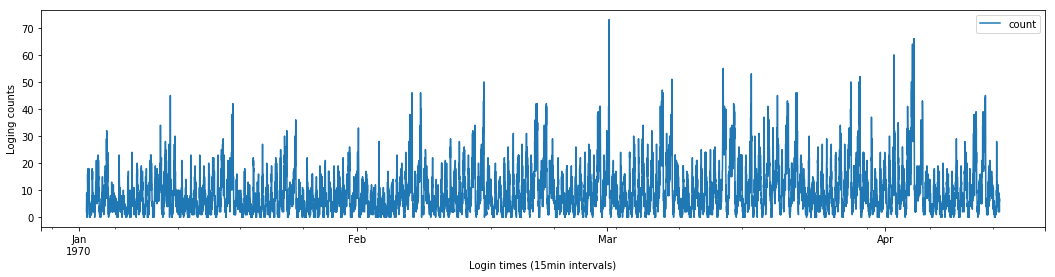

In [31]:
# login counts based on 15-minute time interval
window = (logins.login_time <= last_stamp)
time_interval = '15min'
draw_logins(window, time_interval)

There seems to be some patterns. I will look into the counts more closely.

### Daily cycle

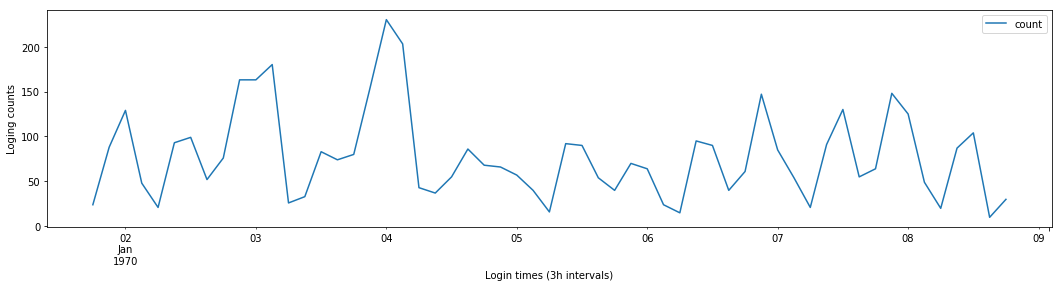

In [34]:
# login counts based on 1-hour time interval durint the first 3 days
window = (logins.login_time <= first_stamp+timedelta(days=7))
time_interval = '3h'
draw_logins(window, time_interval)

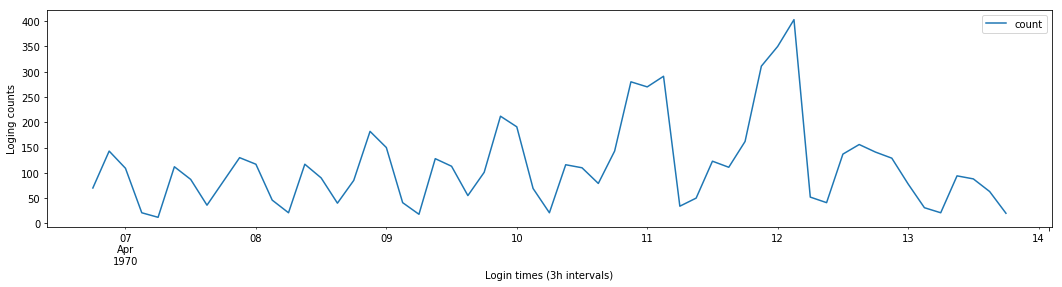

In [35]:
# login counts based on 1-hour time interval durint the last 3 days
window = (logins.login_time > last_stamp-timedelta(days=7))
time_interval = '3h'
draw_logins(window, time_interval)

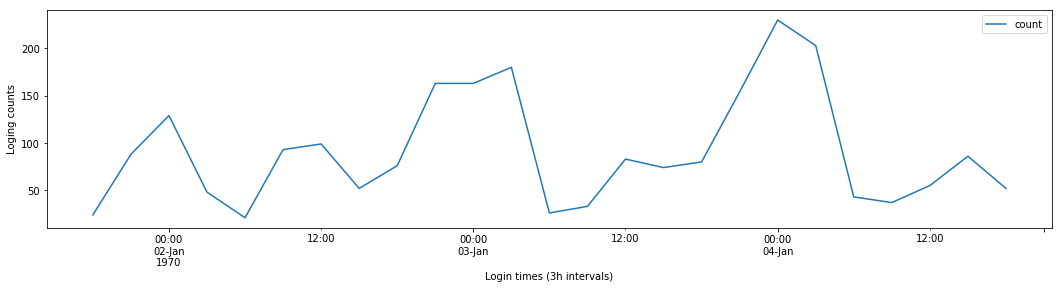

In [36]:
# login counts based on 1-hour time interval durint the first 3 days
window = (logins.login_time <= first_stamp+timedelta(days=3))
time_interval = '3h'
draw_logins(window, time_interval)

- The above graphs show there is a daily cyle with two daily peak times, one around __midnight__ and the other around __noon__.
- Weekends seem to have more higher peaks, so I will check this below.

### Weekly cycle

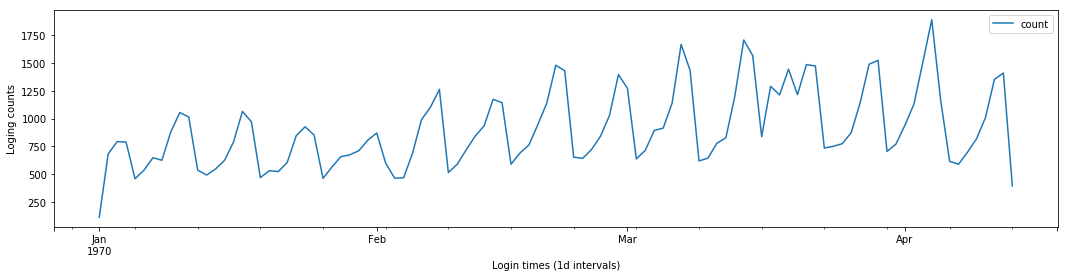

In [39]:
window = (logins.login_time <= last_stamp)
time_interval = '1d'
draw_logins(window, time_interval)

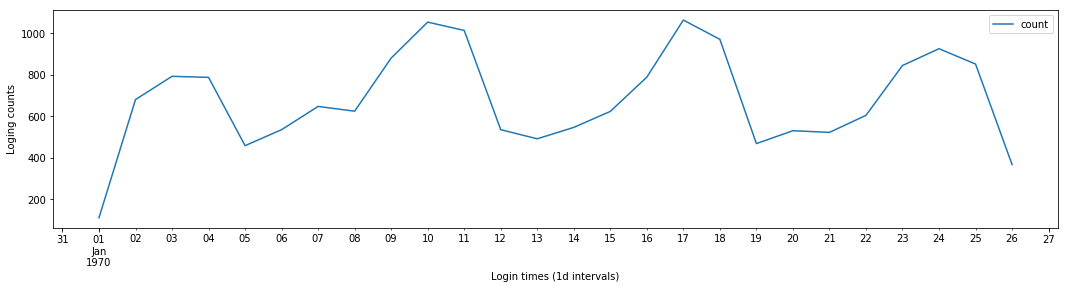

In [40]:
window = (logins.login_time < first_stamp+timedelta(days=25))
time_interval = '1d'
draw_logins(window, time_interval)

The above graphs shows there is a weekly cycle with a weekly peak on every saturday (1/3, 1/10, 1/17, 1/24, ...). Fridays, Satudays, and Sundays have more logins than weekdays.

### Login increase over time

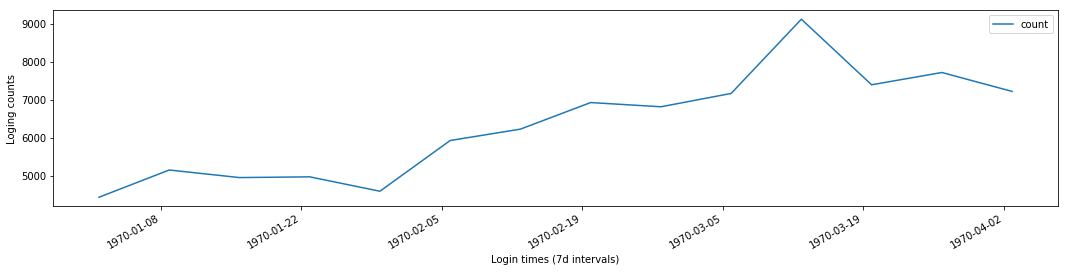

In [41]:
window = (logins.login_time < last_stamp-timedelta(days=4))
time_interval = '7d'
draw_logins(window, time_interval)

The above graph shows the login counts had increased over time (ignoring daily and weekly fluctuations).

<a id='Part2'></a>

## Part 2 ‑ Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
    1. how you will implement the experiment
    1. what statistical test(s) you will conduct to verify the significance of the
observation
    1. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Answers:

1. The key measure of success I choose is the proportion of Ultimate trips using the toll bridge among all Ultimate trips. This metric will show the degree of driver availability for trips across the two cities.  
2. A. One possible way of implementing the experiment is here. Drivers are randomly assigned to two groups, one group who gets reimbursed toll costs for Ultimate trips (experiment group) and the other group who does not get reimbursed (control group). The problem of this grouping is that the drivers assigned to the control group (no reimbursement) can have complaints. This can even discourage their between city trips even more. A way of implementing the exepriment without the problem would be applying the reimbursement for all drivers and then compare the key measure of this experiment to that of old trips made before staring the reimbursement. One risk of this approach can happen when the experiment is finished without success. If the company decides not to continue the reimbursement due to no significant effect, now drivers might be even more discouraged to make between city trips than the time before the experiment. Which risk to take is up to the city operations team. The sample size, the number of trips for the experiment, would be decided by the significance level, minimum detectable effect, and power we want and the baseline proportion of trips between cities measured before the experiment. The experiment should be run for full weeks (at least 2) and until the predetermined number of trips are made. It is also important to avoid seasonality and novelty effect.   

 B. Since we compare two proportions, I would used the one-tailed z-test for two sample proportions. 

 C. If the p-value obatined from the statistical test is less than the significance level (say 0.05) you set before the experiment, it means there was a significant effect of the reimbursement (i.e., the reimbursement promoted more Ultimate trips between cities). Thus, I would recommend to do the toll cost reimbursement to drivers. If the p-value is higher than the significance level, it means there was no effect of the reimbursement and I would not recommend the reimbursement.  


<a id='Part3'></a>

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice).

### Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
import json
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

### 1. Cleaning, Exploratory analysis, and Visualizations

In [77]:
# df = pd.read_json('ultimate_data_challenge.json') 
#ValueError: Expected object or value

In [82]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
    
df_original = pd.DataFrame(data)

In [83]:
df_original.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [84]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


- Columns with Missing vlaues:
  - avg_rating_by_driver
  - avg_rating_of_driver
  - phone 

- Data types: 
  - String: city, phone
  - DateTime: last_trip_date, signup_date
  - Boolean: ultimate_black_user
  - All elses are numeric (float or integer)

In [85]:
# Check numerical columns for outliers or missing values
df_original.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


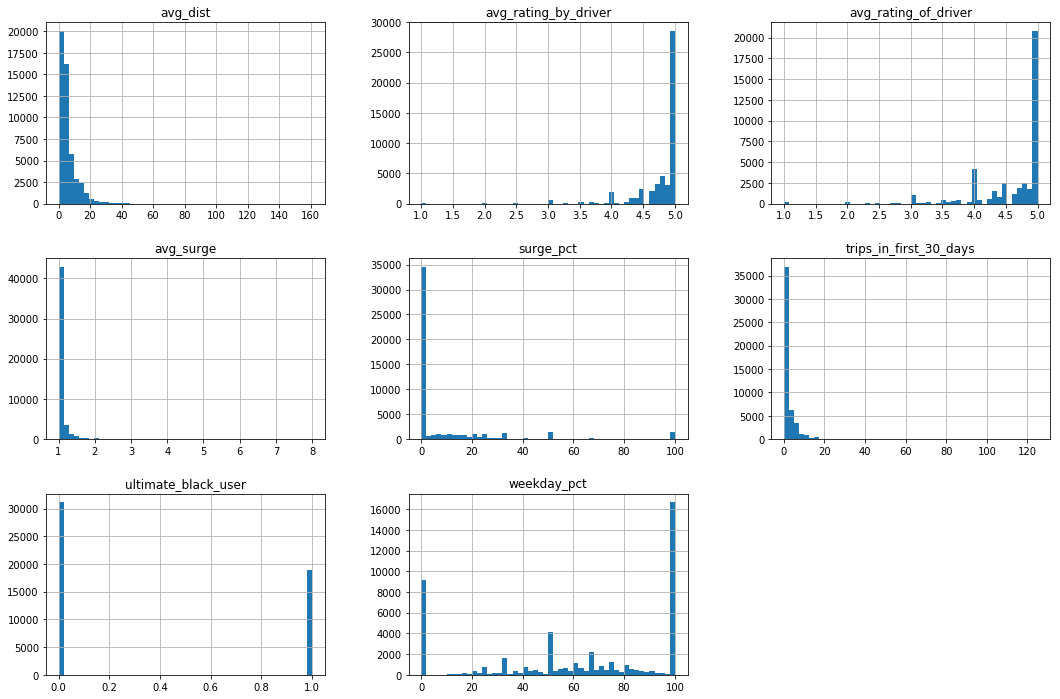

In [94]:
df_original.hist(bins=50, figsize=(18,12))
plt.show()

Their ranges look okay and I see no impossible outliers, but I will double-check avg_surge and trips_in_first_30_days with log scaled y-axis since they are exrremely right-skewed.

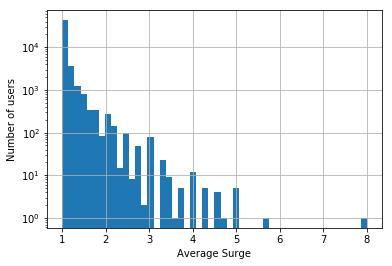

In [100]:
df_original.avg_surge.hist(bins=50)
plt.yscale('log')
plt.xlabel('Average Surge')
plt.ylabel('Number of users')
plt.show()

In [101]:
df_original[df_original.avg_surge==8]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
13861,5.77,5.0,1.0,8.0,Winterfell,2014-01-01,iPhone,2014-01-01,100.0,1,False,100.0


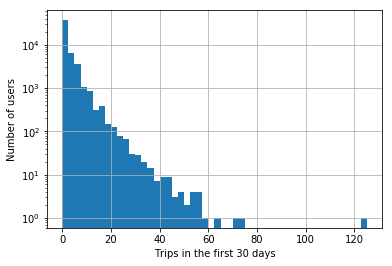

In [99]:
df_original.trips_in_first_30_days.hist(bins=50)
plt.yscale('log')
plt.xlabel('Trips in the first 30 days')
plt.ylabel('Number of users')
plt.show()

In [156]:
round(len(df_original[df_original.trips_in_first_30_days <=1])/len(df),4)

0.59

The proportion of users with only 0 or 1 trip in the first 30 days are 59%.

In [102]:
df_original[df_original.trips_in_first_30_days>120]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
18514,2.02,4.8,5.0,1.12,King's Landing,2014-06-30,iPhone,2014-01-02,14.4,125,True,72.0


I still found no suspicious outliers. 

In [117]:
df_original.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [114]:
df_original.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [116]:
sum(df_original.phone.isnull())

396

String columns look fine except that 'phone' column has missing values. These categorical columns will be tranformed to numerical columns using one-hot encoding when building a predictive model.

In [111]:
df_original.ultimate_black_user.value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

This is a boolean column and this column will be used as it is in some
predictive models.

In [110]:
df_original.signup_date[0], type(df_original.signup_date[0])

('2014-01-25', str)

In [ ]:
df_original.signup_date

In [109]:
df_original.last_trip_date[0], type(df_original.last_trip_date[0])

('2014-06-17', str)

These columns should be tranformed to DateTime objects from string objects.

In [118]:
# deep copy
df = df_original.copy()

In [119]:
# String to datatime types
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [122]:
df[['signup_date','last_trip_date']].describe()

,signup_date,last_trip_date
count,50000,50000
unique,31,182
top,2014-01-18 00:00:00,2014-06-29 00:00:00
freq,2948,2036
first,2014-01-01 00:00:00,2014-01-01 00:00:00
last,2014-01-31 00:00:00,2014-07-01 00:00:00


#### Who are active users?


The question says to help Ultimate determine whether or not a user will be active in their 6th month on the system by building a predictive model. This can be interpreted in two ways. 
- Active users are who took trips even 5 months later from their signup date (e.g., a user who signed up on 1/30 and took some trips even after 6/30).
- Active user are who took trips in June or after since the first month of all of these users is January and the second month is Feburary and so on.

Since the last possible trip date possible in this dataset is July 1st, the first interpretation is unfair to those who joined later. For example, a user who joined on 1/30 has only 2 days window, 6/30 and 7/1 for deciding retention while a user who joined on 1/1 has a whole month window. Therefore, I will used the second interpretation. In other words, __I will regard users as active if they were active in June or on July 1 regardless of their sign up dates__. This interpretation is also consistent to the description "The data was pulled several months later; we consider a user retained if they were "active" (i.e. took a trip) in the preceding 30 days".

In [129]:
df[df.last_trip_date >= '2014-06-01 00:00:00'].last_trip_date.min()

Timestamp('2014-06-01 00:00:00')

In [128]:
# Make a column with 1 for active users and 0 for not
df['active_user'] = (df.last_trip_date >= '2014-06-01 00:00:00')*1

In [134]:
print('Proportion of Active Users: ', round(df['active_user'].mean(),4))

Proportion of Active Users:  0.3761


37.61% of users were retained!!

#### Which features can possibly predict retention well?

In [136]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'active_user'],
      dtype='object')

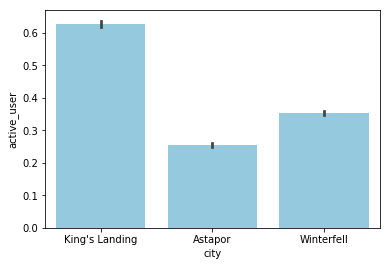

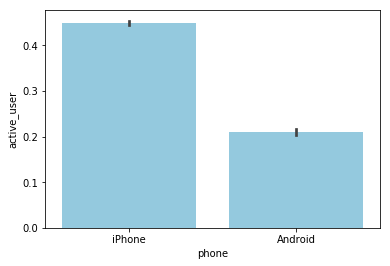

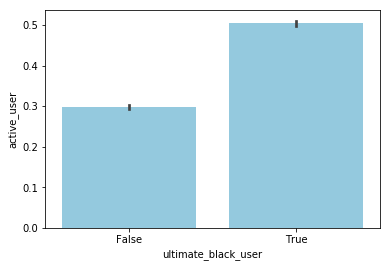

In [144]:
categorical_cols = ['city','phone','ultimate_black_user']
for col in categorical_cols:
    g = sns.barplot(x=col, y='active_user', data = df, color="skyblue")
    plt.show()

All categorical features, city names, phone type (Android vs iPhone), ultimate black service user, seem to be good predictors of user retention. The users who registered in King's Land, use iPhones, and have used Ultimate Black sevices are likely to be more active in their 6th month.

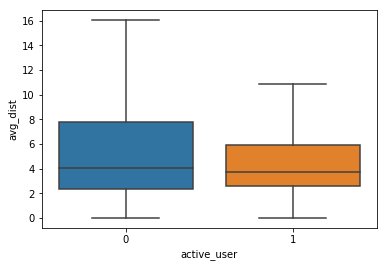

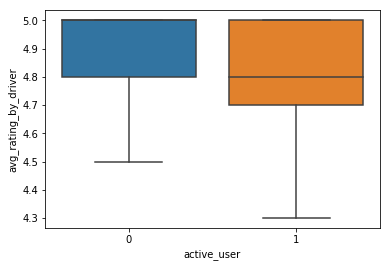

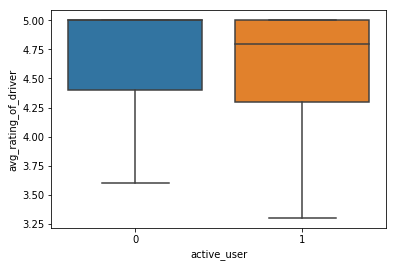

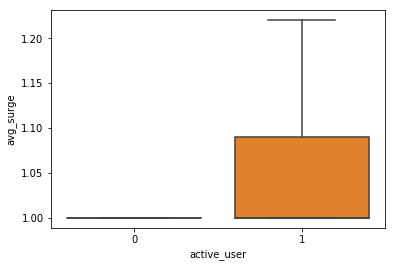

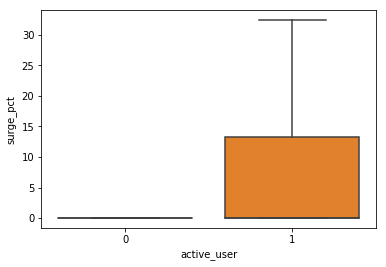

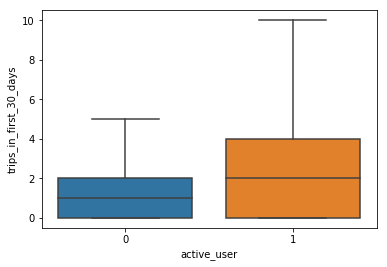

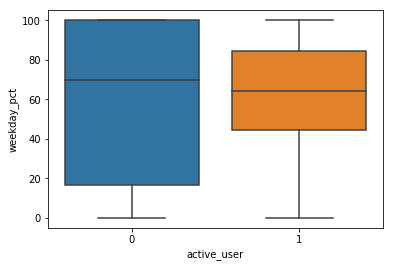

In [148]:
numerical_cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                  'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']
for col in numerical_cols:
    g = sns.boxplot(x='active_user', y=col, data = df, 
                    showfliers=False) #outliers hidden to show boxes better
    plt.show()

Most of numerical features also seem to be likely to help retention predictions.

### 2. Building a predictive model 

#### Preprocessing

In [177]:
df_ML = df.copy()

In [178]:
df_ML.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
       'active_user'],
      dtype='object')

In [179]:
df_ML[['avg_rating_by_driver', 'avg_rating_of_driver','phone']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
avg_rating_by_driver    49799 non-null float64
avg_rating_of_driver    41878 non-null float64
phone                   49604 non-null object
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


I will use a gradient boosting algorithm, LightGBM, which can handle missing values. Thus, I will leave the missing values in the numerical columns, avg_rating_by_driver	and avg_rating_of_driver as they are. Phone column has 'Android', 'iPhone' and None values, so one-hot encoding will be done manually for this column while the other categorical column ''city' will be one-hot encoded with get_dummies() method.

In [180]:
def phone(x):
    if x:
        if x=='iPhone':
            return 1
        else:
            return 0
    return None

In [181]:
# manual one-hot encoding for 'phone'
df_ML['iPhone'] = df_ML.phone.apply(phone)

In [182]:
# remove unnecessary columns
df_ML = df_ML.drop(['last_trip_date', 'signup_date', 'phone'], axis=1)
df_ML.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user,iPhone
0,3.67,5.0,4.7,1.10,King's Landing,15.4,4,True,46.2,1,1.0
1,8.26,5.0,5.0,1.00,Astapor,0.0,0,False,50.0,0,0.0
2,0.77,5.0,4.3,1.00,Astapor,0.0,3,False,100.0,0,1.0
3,2.36,4.9,4.6,1.14,King's Landing,20.0,9,True,80.0,1,1.0
4,3.13,4.9,4.4,1.19,Winterfell,11.8,14,False,82.4,0,0.0


In [183]:
# one-hot encoding for categorical columns
df_ML = pd.get_dummies(df_ML, drop_first=True)
df_ML.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_user,iPhone,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,1,1.0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,0,0.0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,0,1.0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,1,1.0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,0,0.0,0,1


In [185]:
# Split training-test sets
y = df_ML.active_user.values
X = df_ML.drop('active_user', axis=1).values

In [186]:
# check the size of y and X
len(y), len(X), len(X[0])

(50000, 50000, 11)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, 
                                                    random_state=32)

In [196]:
# Check the ratio of positive cases for training and test sets
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.376325, 0.3751)

The proportions of positive cases for training and test sets are about the same, so stratified shuffle split is unnecessary.

#### Training and testing a model

In [226]:
# Make a function that prints the tuned hyper-parameters and metrics
def print_results(clf, verbose=False):
    print("Best AUC and hyper-parameters on dev. set:")
    print("%0.4f for %r" %(clf.best_score_, clf.best_params_))
    print() 
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']
    dev_result={'means':means,'stds':stds,'params':params}
    if verbose:   
        print("Grid search AUCs on dev. set:")
        for mean, std, params in zip(means, stds, params):
            print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))
    AUC = clf.score(X_test, y_test)
    print("\nAUC on test set: {:.4f}".format(AUC))
    return dev_result

In [227]:
%%time
# with default hyperparameters
param_grid = {}
lgbm = lgb.LGBMClassifier(random_state =32) #boosting_type='gbdt' by default   
clf= GridSearchCV(lgbm, param_grid, scoring='roc_auc', cv=3)
clf.fit(X_train, y_train)
dev_result = print_results(clf, True)

Best AUC and hyper-parameters on dev. set:
0.8583 for {}

Grid search AUCs on dev. set:
0.8583 (+/-0.0063) for {}

AUC on test set: 0.8575
Wall time: 1.15 s


The above shows the performance of LighGBM with default hyperparamters. Here are the hyperparameters I am going to tune and their default values: 
- max_depth=-1
- learning_rate=0.1
- n_estimators=100
- subsample=1.0
- subsample_freq=0
- colsample_bytree=1.0

In [229]:
%%time
param_grid = {'max_depth':[5,10,20],
             'learning_rate':[.01,.05,.1],
             'n_estimators':[100,200,500],
             'subsample':[.5,.8,1.0],
             'subsample_freq':[0,15,50],
             'colsample_bytree':[.5,.8,1.0]}
lgbm = lgb.LGBMClassifier(random_state =32)   
clf= GridSearchCV(lgbm, param_grid, scoring='roc_auc', cv=3)
clf.fit(X_train, y_train)
dev_result_1 = print_results(clf)

Best AUC and hyper-parameters on dev. set:
0.8607 for {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 500, 'subsample': 0.5, 'subsample_freq': 0}


AUC on test set: 0.8607
Wall time: 21min 35s


In [233]:
result_df_1 = pd.DataFrame(dev_result_1)

In [242]:
best_params = {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 
               'n_estimators': 500, 'subsample': 0.5, 'subsample_freq': 0}
result_df_1[result_df_1.params == best_params]

,means,params,stds
153,0.860744,"{'colsample_bytree': 0.5, 'learning_rate': 0.0...",0.003046


In [243]:
# Best hyperparameters
for param in result_df_1[result_df_1.means >=0.8607].params:
    print(param)

{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 500, 'subsample': 0.5, 'subsample_freq': 0}
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 500, 'subsample': 0.8, 'subsample_freq': 0}
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 500, 'subsample': 0.8, 'subsample_freq': 15}
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 500, 'subsample': 1.0, 'subsample_freq': 0}
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 500, 'subsample': 1.0, 'subsample_freq': 15}
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 500, 'subsample': 1.0, 'subsample_freq': 50}


'subsample_freq': 0 means no subsampling and 'subsample': 1.0 also means using all samples for each tree. Most of these best hyperparameter combinations require no subsampling or {'subsample': 0.8, 'subsample_freq': 15} is also a good combination.

I will also use the best learning_rate and n_stimators I have found without further tuning for them.

In [247]:
%%time
param_grid = {'max_depth':[20,25,30],
              'subsample': [0.8,1.0], 
              'subsample_freq': [0,15],
              'colsample_bytree':[.3,.4,.5]}
lgbm = lgb.LGBMClassifier(random_state =32, 
                          learning_rate=.05, n_estimators=500)   
clf= GridSearchCV(lgbm, param_grid, scoring='roc_auc', cv=3)
clf.fit(X_train, y_train)
dev_result_2 = print_results(clf)

Best AUC and hyper-parameters on dev. set:
0.8610 for {'colsample_bytree': 0.4, 'max_depth': 25, 'subsample': 0.8, 'subsample_freq': 0}


AUC on test set: 0.8598
Wall time: 1min 40s


The best AUC found on the test set is .8598!!

I found a better AUC score on the development set after a little bit of tuning (After tuning: 8610 vs Before tuning: 0.8583), the AUC on the test set was also improved (After tuning: 0.8598 vs Before tuning: .8575).

I chose LightGBM since I wanted to use a fast gradient boosting algorithm, which usually outperforms Random Forest (bagging method). LightGBM can also handle missing values, so it was suitable for my dataset. The alternative algorithm I considered was another fast gradient boosting algorithm XGBoost. I chose LightGBM because it is usually faster than XGBoost.

#### Feature Importances

In [249]:
# Make a function that draw a feature importance plot
def plot_feature_importances(model_name, importances, feature_names, num_features=None, 
                             fig_size=None, ax=None):
    features_importances = pd.DataFrame(sorted(zip(feature_names, importances), 
                                           key = lambda tup: tup[1], reverse=True),
                                   columns=['features','importances'])
    data = features_importances[:num_features]
    data.plot('features','importances', kind='barh', ax=ax,
              color='blue', figsize=fig_size, legend = None)
    plt.gca().invert_yaxis() # reverse the order of features
    plt.ylabel('feature importances')
    if num_features:
        plt.title(model_name + '\nTop '+str(num_features))
    else: 
        plt.title(model_name + '\nAll Features')
    
    return features_importances # return all importances

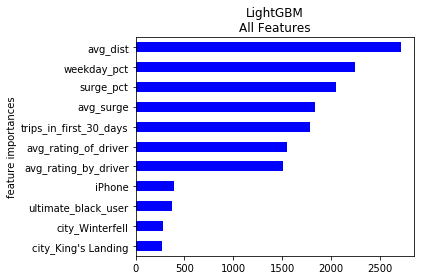

In [257]:
feature_col = df_ML.drop('active_user', axis=1).columns
importances = plot_feature_importances('LightGBM', clf.best_estimator_.feature_importances_, feature_col)
plt.tight_layout() 

As we saw in the barplots and boxplots, all featuers help predicting user retentions at some degrees. The least important 4 features are all categorical features. The most important features are the average distance of trips taken in the first 30 days after signups. The percent of weekday trips and the percent of trips with surge multiplier over 1 are the next most important features in the predictions.

#### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

The feature importance anlaysis suggests that all of these features are important in the retention prediction. The features importance analysis together with EDA shows that the users who take trips with surge multipliers higher than 1 more often tend to be active after 5 months. One possible reason for this is the users who are reluctant to use high surge multipliers eventually stop using Ultimate. If this is true for some users, Ultimate can try to reduce surging multipliers or use special offers to improve long-term rider retention. Moreover, iPhone users are much more likely to be retained than Android users (over 2 times), so Ultimate should check if there are any problems with their Android app.